In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [43]:
dic = {
    '0': 'lower extremity artery', '1': 'general abodomen', '2': 'ovary', '3': 'uterus',
    '4': 'fetus/placenta', '5': 'intestinal tract', '6': 'Bone and soft tissue tumor',
    '7': 'Bone and soft tissue tumor(joint)', '8': 'bladder', '9': 'mediastinum', 
    '10': 'heart', '11': 'breast', '12': 'head/neck artery',
    '13': 'maltiple sclerosis', '14': 'brainstem', '15': 'epilepsy',
    '16': 'jaw', '17': 'orbital tumor', '18': 'general brain',
    '19': 'optinc nerve', '20': 'newborn brain', '21': 'carotid plaque/artery dissection',
    '22': 'pituitaly gland', '23': 'brian metastasis', '24': 'brain tumor/encephalitis',
    '25': 'vestibulocochlear', '26': 'dementia', '27': 'head/spine(newborn)', 
    '28': 'kidney/adrenal glad', '29': 'abdominal vessels', '30': 'hip joint',
    '31': 'knee', '32': 'Myositis', '33': 'ankle joint',
    '34': 'toes', '35': 'upper abdomen', '36': 'MRCP',
    '37': 'liver', '38': 'head and neck(soft tissue)', '39': 'prostate', 
    '40': 'hernia', '41': 'lower abdomen', '42': 'rectum', 
    '43': 'cervical spine', '44': 'brachial plexus', '45': 'thoracic spine', 
    '46': 'lumbar spine', '47': 'whole spine', '48': 'Spinal cord lesion', 
    '49': 'Sacral spine pelvis', '50': 'shoulder', '51': 'wrist',
    '52': 'finger', '53': 'elbow'}

In [44]:
def roc_data(path):
    df=pd.read_csv(path)
    #確立とラベルに分割
    df_data = df.drop(['id', 'y_test'], axis =1)
    df_data.rename(columns=dic, inplace=True)
    df_y = df['y_test'].map(str)
    # ラベルを文字に変換
    df_y = df_y.map(dic)
    # ラベルはohe
    y_one_hot = label_binarize(df_y, classes=df_data.columns)
    y_one_hot = pd.DataFrame(y_one_hot)
    
    #クラスごとのROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # ROCとAUCを算出
    for i ,name in enumerate(df_data.columns):
        fpr[name], tpr[name], _ = roc_curve((y_one_hot[i]), df_data[name])
        #クラスごとのROC＿AUCを計算
        roc_auc[name] = auc(fpr[name], tpr[name])

    # microのAUCを算出    
    fpr['micro'], tpr['micro'], _ = roc_curve(
        np.array(y_one_hot).ravel(), np.array(df_data).ravel()
    )
    roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])
    
    
    return fpr , tpr, roc_auc

In [45]:
def make_roc(fpr, tpr, roc_auc, title):
    
    plt.figure(figsize=(20,16))

    for index, class_key in enumerate(fpr):
        if class_key == 'micro':
            label = '{} ROC curve (area = {:.2})'.format(class_key, roc_auc[class_key])
        else:
            label = ' {}  (area = {:.2})'.format(class_key, roc_auc[class_key])

        plt.plot(fpr[class_key], tpr[class_key], label=label)

    #0.5を点線で
    plt.plot([0,1], [0,1], 'k--')
    # x軸は０－１で
    plt.xlim([0.0, 1.0])
    # y軸も０－１で
    plt.ylim([0.0, 1.0])
    # 軸ラベルをつける
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # 凡例をグラフに表示
    plt.legend(loc='lower right')
    plt.title('ROC Curve   {} model'.format(title))
    plt.savefig("{}.png".format(title),facecolor="white")
    
    plt.show()

In [46]:
flfpr, fltpr, flauc = roc_data('result/ft_LGBM_preds.csv')
fnfpr, fntpr, fnauc = roc_data('result/ft_NN_preds.csv')
slfpr, sltpr, slauc = roc_data('result/sB_LGBM_preds.csv')
snfpr, sntpr, snauc = roc_data('result/sB_NN_preds.csv')

In [56]:
snauc

{'lower extremity artery': 0.9998630512188441,
 'general abodomen': 0.9941243712848651,
 'ovary': 0.9975771036292967,
 'uterus': 0.9986221808651715,
 'fetus/placenta': 0.9987268886895634,
 'intestinal tract': 1.0,
 'Bone and soft tissue tumor': 0.9875560588901471,
 'Bone and soft tissue tumor(joint)': 0.9953391556179013,
 'bladder': 0.987707890458922,
 'mediastinum': 0.991672848220909,
 'heart': 0.9992769161721436,
 'breast': 0.9999325491042521,
 'head/neck artery': 0.981547374111458,
 'maltiple sclerosis': 0.9926658849991624,
 'brainstem': 0.9693810916179337,
 'epilepsy': 0.9807614079586514,
 'jaw': 1.0,
 'orbital tumor': 0.9989618637598852,
 'general brain': 0.9783240105540897,
 'optinc nerve': 0.9999999999999999,
 'newborn brain': 0.9985199678908289,
 'carotid plaque/artery dissection': 0.9792506424144708,
 'pituitaly gland': 0.9978275634750994,
 'brian metastasis': 0.9961041162600749,
 'brain tumor/encephalitis': 0.9732392495530744,
 'vestibulocochlear': 0.9893562958780351,
 'demen

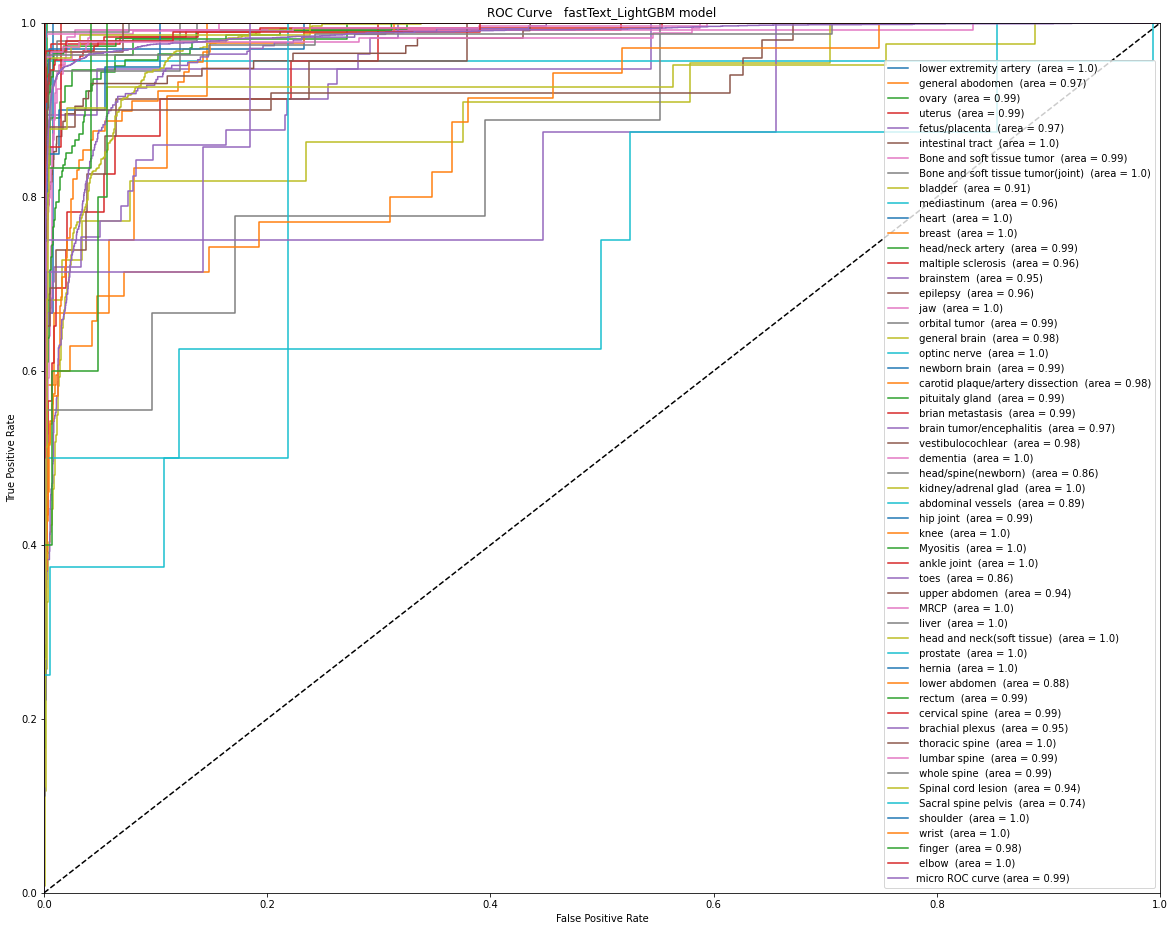

In [6]:
make_roc(flfpr, fltpr, flauc, 'fastText_LightGBM')

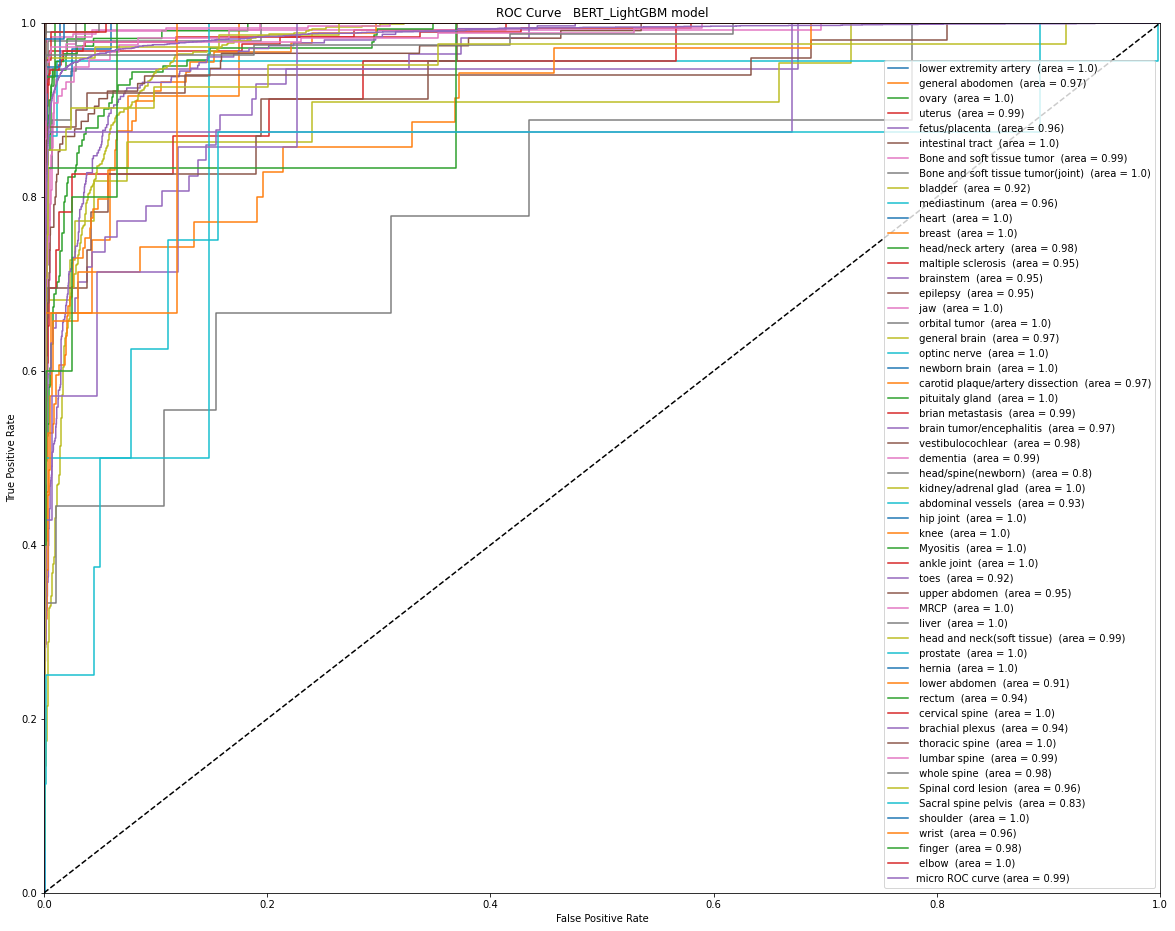

In [31]:
make_roc(slfpr, sltpr, slauc, 'BERT_LightGBM')

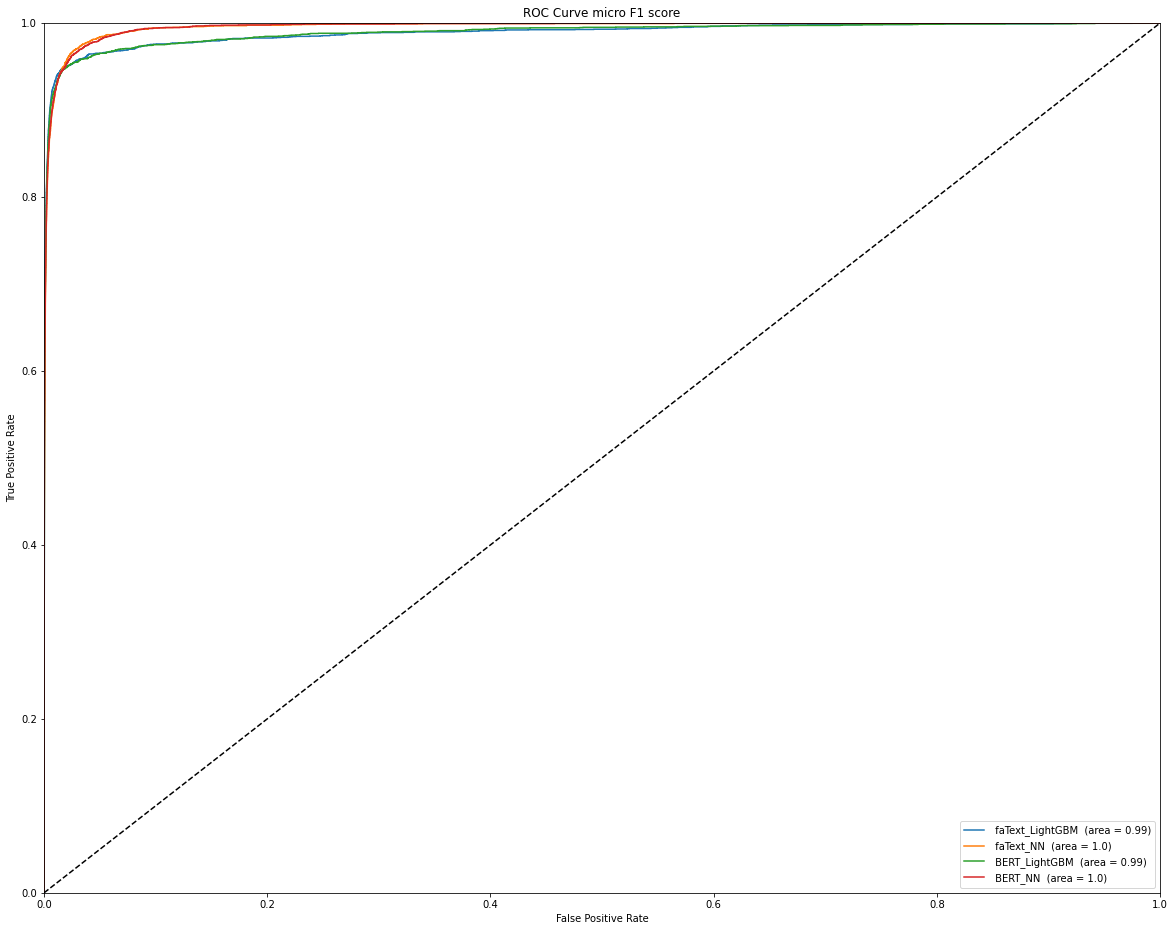

In [32]:
plt.figure(figsize=(20,16))

label = ' faText_LightGBM  (area = {:.2})'.format(flauc['micro'])
plt.plot(flfpr['micro'], fltpr['micro'], label=label)

label = ' faText_NN  (area = {:.2})'.format(fnauc['micro'])
plt.plot(fnfpr['micro'], fntpr['micro'], label=label)

label = ' BERT_LightGBM  (area = {:.2})'.format(slauc['micro'])
plt.plot(slfpr['micro'], sltpr['micro'], label=label)

label = ' BERT_NN  (area = {:.2})'.format(snauc['micro'])
plt.plot(snfpr['micro'], sntpr['micro'], label=label)

#0.5を点線で
plt.plot([0,1], [0,1], 'k--')
# x軸は０－１で
plt.xlim([0.0, 1.0])
# y軸も０－１で
plt.ylim([0.0, 1.0])
# 軸ラベルをつける
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 凡例をグラフに表示
plt.legend(loc='lower right')
plt.title('ROC Curve micro F1 score')
plt.savefig("{}.png".format('micro_auc'),facecolor="white")

plt.show()

In [40]:
def dataforR (fl,fn,sl,sn):
    # https://meditech-ai.com/r-auc-p-value/
    for c in range(len(df1.columns)-2):
        df = pd.concat([fl, fn, sl, sn], axis=1)[str(c)].set_axis(
            ['fl', 'fn', 'sl', 'sn'],axis=1)
        df = pd.concat([fl['y_test'], df] ,axis=1)
        
        df.loc[df['y_test']  == c, 'true'] = 1
        df.loc[df['y_test']  != c, 'true'] = 0
        df.to_csv(f'forR/cat_nuber__{c}__.csv')

In [41]:
dataforR(fl, fn, sl, sn)